# Models using Ravi Selker's `wfComboPack`

In [13]:
import pyjags
import os

# this import assumes pjbcmassistant.py is two folders
# above this notebook. You may need to redirect it if
# you get a ModuleNotFoundError.
os.chdir('/home/isaiah/projects/pyjagsBCMport/pjBCM/wfComboPackModels')
nb_path = os.getcwd()

parent_path = os.path.split(nb_path)[0]
os.chdir('..')#os.path.split(parent_path)[0])

from pjbcmassistant import ModelHandler, SampleHandler
os.chdir(nb_path)

## Tally Model

Import modules we'll need

In [32]:
import pandas as pd
from scipy.io import loadmat

Import the data

In [50]:
mat = loadmat('FeatureEnvironments.mat')

In [46]:
#type(mat['validity'])
mat['d']
#pulled these out manually like a buffoon.

array([[(array(['German Cities'], dtype='<U13'), array([[array(['soccer team'], dtype='<U11')],
       [array(['state capital'], dtype='<U13')],
       [array(['former east germany'], dtype='<U19')],
       [array(['industrial belt'], dtype='<U15')],
       [array(['licence plate'], dtype='<U13')],
       [array(['intercity trainline'], dtype='<U19')],
       [array(['exposition site'], dtype='<U15')],
       [array(['national capital'], dtype='<U16')],
       [array(['university'], dtype='<U10')]], dtype=object), array([[9]], dtype=uint8), array([[array(['Berlin'], dtype='<U6')],
       [array(['Hamburg'], dtype='<U7')],
       [array(['Munich'], dtype='<U6')],
       [array(['Cologne'], dtype='<U7')],
       [array(['Frankfurt'], dtype='<U9')],
       [array(['Essen'], dtype='<U5')],
       [array(['Dortmund'], dtype='<U8')],
       [array(['Stuttgart'], dtype='<U9')],
       [array(['Duesseldorf'], dtype='<U11')],
       [array(['Bremen'], dtype='<U6')],
       [array(['Duisburg'], 

In [51]:
cues = [[0, 1, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 1, 1, 0, 1],
       [1, 1, 0, 0, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 1, 1, 1, 0, 1],
       [0, 0, 0, 1, 1, 1, 1, 0, 1],
       [1, 0, 0, 1, 0, 1, 1, 0, 1],
       [1, 1, 0, 0, 1, 1, 1, 0, 1],
       [0, 1, 0, 0, 1, 1, 1, 0, 1],
       [1, 1, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 1, 1, 1, 0, 1],
       [0, 0, 1, 0, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 1, 1, 1, 0, 1],
       [1, 0, 1, 0, 0, 1, 0, 0, 1],
       [1, 0, 0, 1, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [1, 1, 0, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1]]

In [78]:
data = pd.read_csv('LessIsMoreData.csv')

In [79]:
data.head(5)

,subjID,country,stimA,stimB,decision,recogA,recogB,accuracy
0,1,1,39,55,2.0,0,0,0
1,1,1,51,68,1.0,0,0,1
2,1,1,15,34,1.0,1,0,1
3,1,1,28,66,2.0,0,0,0
4,1,1,65,10,2.0,0,1,1


In [80]:
data = data.loc[(data['country'] == 1) & (data['recogA'] == 1) & (data['recogB'] == 1)]
data.head(5)

,subjID,country,stimA,stimB,decision,recogA,recogB,accuracy
14,1,1,19,37,1.0,1,1,1
182,3,1,27,57,2.0,1,1,0
190,3,1,19,37,1.0,1,1,1
191,3,1,58,35,1.0,1,1,0
193,3,1,76,63,1.0,1,1,0


In [81]:
#recode dec
data['decision'] -= 1

In [82]:
data.head()

,subjID,country,stimA,stimB,decision,recogA,recogB,accuracy
14,1,1,19,37,0.0,1,1,1
182,3,1,27,57,1.0,1,1,0
190,3,1,19,37,0.0,1,1,1
191,3,1,58,35,0.0,1,1,0
193,3,1,76,63,0.0,1,1,0


In [85]:
stimA = data['stimA'].values
stimB = data['stimA'].values
dec = data['decision'].values
nTrials = len(dec)
val = [0.8745,0.7657,0.5143,0.5637,0.7538,0.7780,0.9099,1,0.7140]

In [86]:
print(dec)

[0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:


# with open('d.txt', 'r') as file:
#     d = [[int(i) for i in line.rstrip().split(',')] for line in file]
    
# with open('truez.txt', 'r') as file:
#     truez = [int(i.rstrip()) for i in file.readlines()]

import the custom module

In [56]:
pyjags.modules.load_module('wfComboPack')

In [87]:

# import numpy as np

spec = """
model:
model {
    for (i in 1:nTrials) {
        out[i,1:2] <- TALLY(cues[stimA[i],], cues[stimB[i],], s)
        choice[i] <- out[i,1]
        ev[i] <- out[i,2]
        dec[i] ~ dbern(equals(choice[i],1)*(1-gamma) + equals(choice[i],0)*gamma + equals(choice[i], 0.5)*0.5)
    }
    s <- order(-val)
    gamma ~ dunif(0, 0.5)
}


settings:
chains = 2
samples = 300
thinning = 0
burnin = 100

data:
#variables are assigned below using the setdata method


sample:
gamma
choice


"""


model_spec = ModelHandler(spec)

#manually set our data
model_spec.set_data('stimA',stimA)
model_spec.set_data('stimB',stimB)
model_spec.set_data('dec',dec)
model_spec.set_data('nTrials',nTrials)
model_spec.set_data('val',val)
model_spec.set_data('cues',cues)

pyjags_model = pyjags.Model(**model_spec.get_model_args())
sample_data = pyjags_model.sample(**model_spec.get_sample_args())

sample_handler = SampleHandler(sample_data)

adapting: iterations 200 of 200, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 600 of 600, elapsed 0:00:00, remaining 0:00:00


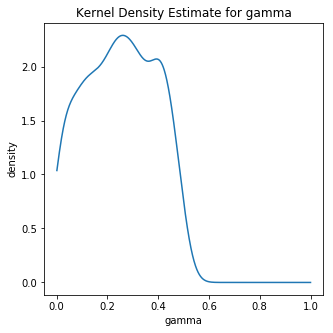

In [93]:
sample_handler.vizkde('gamma')